# CS - 3. Common Algorithms - 3.6 Greedy Algorithms - 3.6.3 Ford Fulkerson algorithm

 

Ford Fulkerson Algorithm
💡Ford Fulkerson Algorithm is a greedy algorithm that is used to find the maximum flow in a flow network. It is also known as the Edmonds-Karp Algorithm.

포드 풀커슨 알고리즘은 흐름 네트워크에서 최대 흐름을 찾는 데 사용되는 탐욕스러운 알고리즘입니다. 에드먼즈-카프 알고리즘이라고도 합니다.

 

포드-풀커슨(Ford-Fulkerson) 알고리즘은 네트워크 플로우 문제를 해결하기 위한 방법 중 하나입니다.

이 알고리즘은 소스 노드에서 타겟 노드로의 최대 플로우를 찾는 문제를 해결합니다.

이를 위해, '증가 경로(augmenting path)'를 이용하는데, 증가 경로란 소스에서 타겟으로 이어지는 경로 중 아직 더 많은 플로우를 통과시킬 수 있는 경로를 말합니다.

Ford Fulkerson 알고리즘의 동작 원리는 이렇습니다.
1. 모든 간선의 플로우를 0으로 초기화합니다.
2. 증가 경로가 존재하는 동안 다음의 작업을 반복합니다.
3. 증가 경로에 대한 최소 잔여 용량을 찾습니다.
4. 그 경로에 대해 최소 잔여 용량만큼 플로우를 증가시킵니다.
이 과정을 반복하면서 소스에서 타겟으로의 플로우를 최대로 만드는 것이 Ford-Fulkerson 알고리즘의 목표입니다.

 

## In Python

In [7]:
class Graph: 

    def __init__(self, vertices): 
        self.verts = vertices   # 그래프의 정점 수를 저장합니다.
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]   # 2차원 배열을 사용하여 그래프를 나타냅니다.

    # 너비 우선 탐색(BFS)을 통해 소스에서 타겟으로 이어지는 경로가 있는지 확인합니다.
    def BFS(self, s, t, parent): 
        visited =[False]*(self.verts)  # 모든 정점을 방문하지 않은 상태로 초기화합니다.
        queue=[] 
        queue.append(s)  # 소스를 큐에 추가합니다.
        visited[s] = True  # 소스를 방문한 상태로 표시합니다.

        while queue: 
            u = queue.pop(0) 

            for ind, val in enumerate(self.graph[u]): 
                if visited[ind] == False and val > 0 :   # 방문하지 않은 정점과 용량이 0보다 큰 경로를 찾습니다.
                    queue.append(ind)  # 찾은 정점을 큐에 추가합니다.
                    visited[ind] = True  # 찾은 정점을 방문한 상태로 표시합니다.
                    parent[ind] = u  # 해당 정점의 부모를 저장합니다.

        return True if visited[t] else False  # 타겟을 방문했다면 True를, 방문하지 않았다면 False를 반환합니다.

    # 소스에서 타겟으로의 최대 플로우를 계산합니다.
    def FordFulkerson(self, source, sink): 
        parent = [-1]*(self.verts)  # 부모를 저장하는 리스트를 초기화합니다.
        max_flow = 0  # 최대 플로우를 0으로 초기화합니다.

        while self.BFS(source, sink, parent) :  # BFS를 사용하여 증가 경로를 찾습니다.
            path_flow = float("Inf")  # 경로의 플로우를 무한대로 초기화합니다.
            s = sink 
            while(s != source): 
                path_flow = min (path_flow, self.graph[parent[s]][s])  # 경로의 최소 용량을 찾습니다.
                s = parent[s] 

            max_flow += path_flow  # 최대 플로우에 경로의 최소 용량을 더합니다.

            v = sink 
            while(v != source): 
                u = parent[v] 
                self.graph[u][v] -= path_flow  # 정방향 간선의 용량을 줄입니다.
                self.graph[v][u] += path_flow  # 역방향 간선의 용량을 늘립니다.
                v = parent[v] 

        return max_flow  # 최대 플로우를 반환합니다.

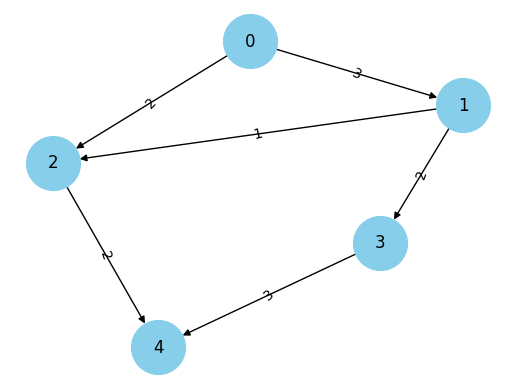

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프를 2차원 리스트로 표현합니다.
g = [[0, 3, 2, 0, 0], 
     [0, 0, 1, 2, 0], 
     [0, 0, 0, 0, 2], 
     [0, 0, 0, 0, 3], 
     [0, 0, 0, 0, 0]]

# 네트워크X로 그래프를 생성합니다.
G = nx.DiGraph()

# 그래프의 각 노드와 간선을 추가합니다.
for i in range(len(g)):
    for j in range(len(g[i])):
        if g[i][j] != 0:
            G.add_edge(i, j, weight=g[i][j])

# 간선 라벨을 설정합니다.
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

# 그래프의 위치를 설정합니다.
pos=nx.spring_layout(G)

# 그래프를 그립니다.
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos, with_labels = True, node_size=1500, node_color="skyblue")

# 그래프를 화면에 표시합니다.
plt.show()


In [8]:
g = Graph(5) 
g.graph = [[0, 3, 2, 0, 0], 
           [0, 0, 1, 2, 0], 
           [0, 0, 0, 0, 2], 
           [0, 0, 0, 0, 3], 
           [0, 0, 0, 0, 0]] 


In [9]:
print(g.FordFulkerson(0, 4)) 


4


0번 노드에서 4번노드가 타겟일때 최대 플로우를 계산합니다.

폴드-풀커슨 알고리즘의 작동 과정대로 따라가 보겠습니다.

1. 초기의 모든 플로우는 0

2. 증가 경로를 찾습니다. 

 0-1-3-4 또는 0-2-4 입니다.

3. 증가경로에서 가장 작은 용량을 찾습니다.

이 값이 이 경로를 통해 흘러갈 수 있는 플로우의 양입니다.

예로, 0-1-3-4 라면, 이 경로의 간선의 용량은 각각 3,2,3 이므로 가장 작은 값인 2가 이 경로를 통해 흘러갈 플로우의 양이 됩니다.

4. 이 플로우를 총 플로우에 더하고, 이 플로우만큼 각 간선의 용량을 줄입니다.

위 예시의 경우, 총플로우는 2가 되고, 간선의 용량은 (0-1 :1), (1-3 : 0), (3-4 : 1)이 됩니다.

5. 이 과정을 증가 경로가 없을 때까지 반복합니다.

 

따라서 0노드에서 4노드 까지 흘러갈 수 있는  최대 플로우가 4입니다.

# 활용
 

폴드-풀커슨 알고리즘은 주로 '네트워크 플로우' 문제에 활용됩니다.

 

1. 교통, 물류 네트워크 최적화

2. 통신 네트워크

3. 자원 할당

4. 이미지 세분화

이미지 처리에서 각 픽셀을 노드로 생각하고 인접 픽셀간의 연결을 간선으로 생각하여 이미지를 여러 영역으로 나눠 볼 수 있습니다.

 

# 참고
https://ratsgo.github.io/data%20structure&algorithm/2017/11/29/maxflow/